In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# first we add the data in data frame using pandas
df=pd.read_csv("E:\\Projects\\acredian assesment\\Fraud.csv")

In [4]:
# using df.info we get the info of data types of v=every column in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [59]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [5]:
# in this step we check the null values by columns in the data set
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# in this styep we check the shape of dataset , rows and columns
df.shape

(6362620, 11)

In [8]:
# this step represent the data in a dataframe format , which is easy to understand as a table format 
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
# by this step we get the all columns unique values ,, which help us to understand the column features and diversity of data
n = df.nunique(axis=0)
print("unique values of each column ",n)

unique values of each column  step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64


In [16]:
# in this step we easly understnad the stats of the data , like mean ,max , std, min, percentiles
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: xlabel='type'>

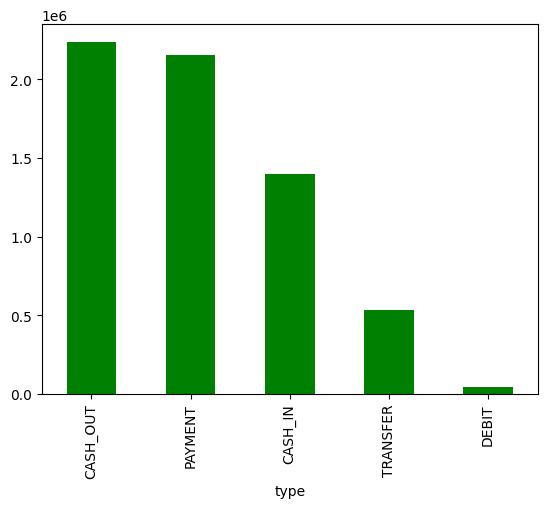

In [28]:
# now we do analysis of data using some charts and visuals 
df.type.value_counts().plot.bar(color="green")

# from this bar graph we observe that no of transactions are cash out type 
# secound highest type is payment but the least one is debit
# trsanfer of amount occurs very less time 


<Axes: xlabel='type'>

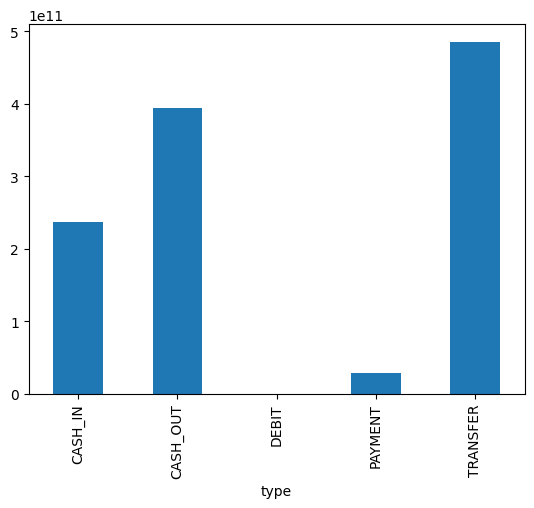

In [29]:
# now we present the bar graph based on the amount by types 
df.groupby('type').amount.sum().plot.bar()
# this graph totaly change the opinion from previous graph 
# where the tranfer type trasantion has more amount then the cash out
# debit is the lowest amount
# where the payment is secound hieghest in previous graph but in this it in secound lowest 

<Axes: >

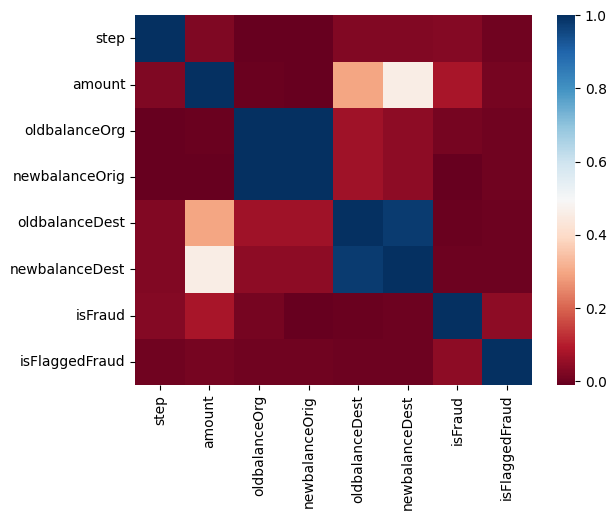

In [34]:
# now we check the correlation between the factors or elements
df1=df.drop(['nameDest','nameOrig','type'],axis=1)
sns.heatmap(df1.corr(),cmap='RdBu')

In [ ]:
# from this heat map we can easly understand the relationship between the old balance and newbalance 
# the dark blue color defines the hard relation or dark red define the less or no relation between the factors
# in this we easily getting the relation between the amount and fraud 
# there is some relatio between the flagged fraud and fraud



In [37]:
# for better understandings we make two diffrnet heat map of frauds transaction and non fraud
fraud = df1.loc[df1.isFraud == 1]
nonfraud = df1.loc[df1.isFraud == 0]

<Axes: >

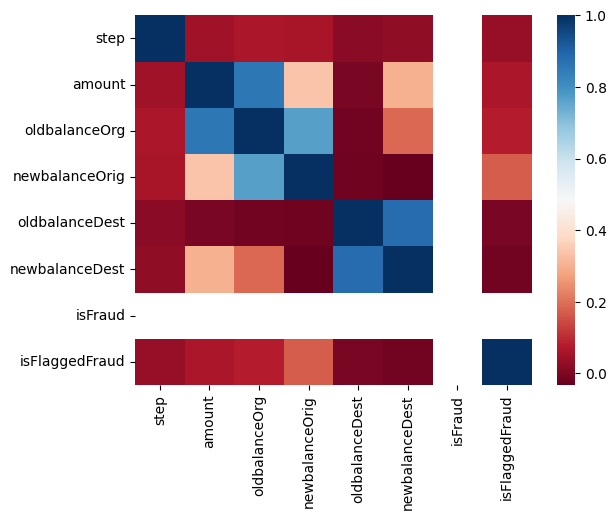

In [38]:
sns.heatmap(fraud.corr(),cmap='RdBu')

<Axes: >

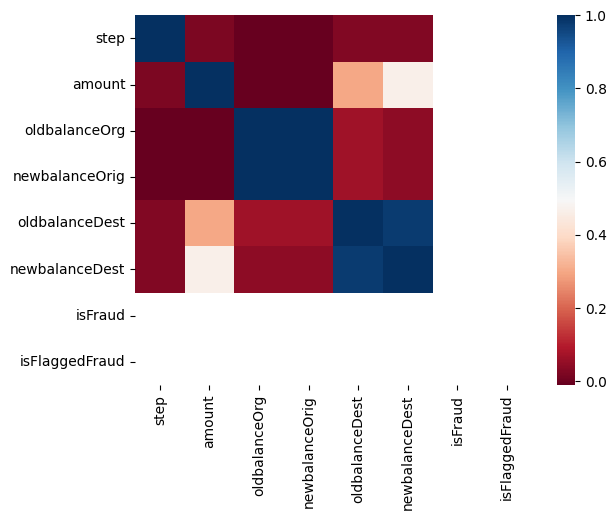

In [39]:
sns.heatmap(nonfraud.corr(),cmap='RdBu')

In [40]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

print('The total number of fraud transaction is {}.'.format(df.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(df.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [41]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


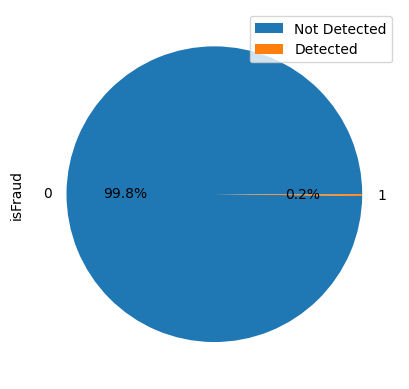

In [47]:
fraud.groupby(['isFlaggedFraud']).sum().plot.pie(y='isFraud',autopct='%1.1f%%')
plt.legend(labels=['Not Detected','Detected'])
plt.show()

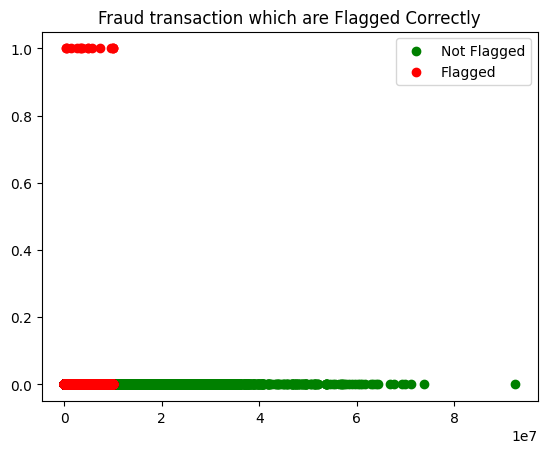

In [46]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

In [48]:
# from all these visuals we understand that the flagged fraud are very less in persentage from the actual frauds , 
# we need a proper model which flagged the fraud before fraud happening



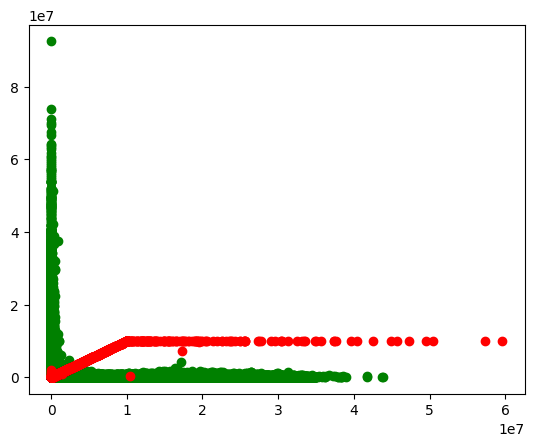

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

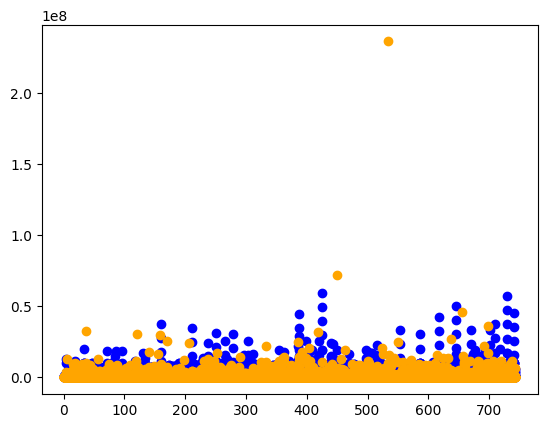

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'],color='b')
ax.scatter(fraud['step'],fraud['oldbalanceDest'],color='orange')
plt.show()

In [ ]:
# these are all the fraud transactions with respect to the steps and the old balance origin or destination


In [57]:

# now we have to clean the data and tranform the data for proper model working
df1=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [58]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [60]:
df1.replace({'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1},inplace=True)

In [61]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [86]:
x=df1.drop('isFraud',axis=1)
y=df1[['isFraud']]

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,2,181.00,181.0,0.00,0.0,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [66]:
model=LogisticRegression()

In [67]:
model.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred=model.predict(x_test)

In [69]:
model.score(x_test,y_test)

0.9983355913130125

In [89]:
from sklearn.tree import DecisionTreeClassifier
DTmodel=DecisionTreeClassifier()
DTmodel.fit(x_train,y_train)
DTmodel.score(x_test,y_test)



0.9996974516787109

In [71]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=15)
RFmodel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=15)

In [72]:
 RFmodel.score(x_test,y_test)

0.9997076675960532

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cross_val_score(LogisticRegression(solver='saga'), x, y,cv=3)

array([0.99870902, 0.99870949, 0.99870902])

In [88]:
#random forest performance using cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=120),x,y,cv=3)

array([0.99925314, 0.98236104, 0.03810601])

In [91]:
y_pred=RFmodel.predict(x_test)

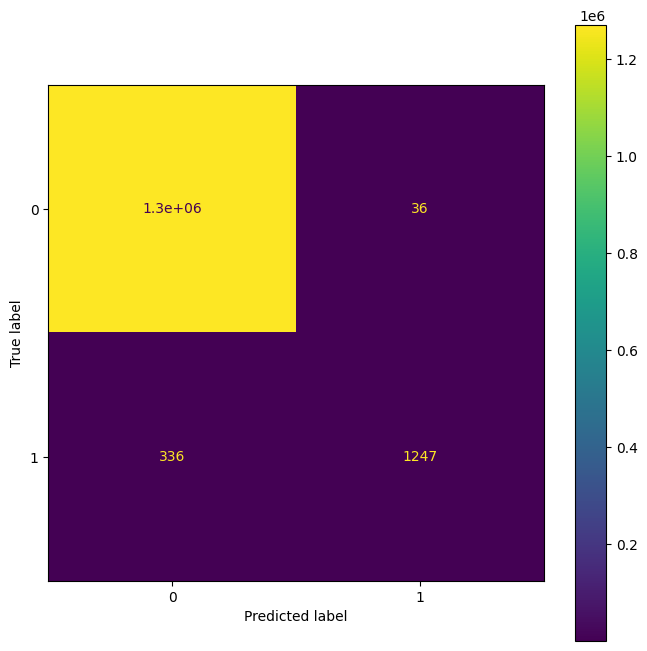

In [94]:
fig, ax = plt.subplots(figsize = (8,8))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_pred, ax=ax);

In [ ]:
#data Cleaning
'''
1.There are no null values. Thus not much of data cleaning is involved.
2.Outliers are not removed for preserving loss of data based on transaction and tree based algorithms are robust in handling outliers.
3.Correlation is checked with following observation,Most of the datapoints are not correlated.

'''

In [ ]:
#select variables to be included in the model.
'''Variables are selected based on following criteria:
1.Relevance of the variables.
2.Non-collinearity and no significant correlation to prevent model from being sensitive.
3.Corecting the skewness.
4.Creating additional features if required.
5.Normalized data (here transformation have played this role)
'''

In [ ]:
#Describe your fraud detection model in elaboration.
'''
1.Import and Explore Dataset
2.Remove correlation if there is correlation between unrelated features.
3.Apply Variable Transformation on the skewed columns.
4.Replace categorical variables with int
5.Preserve customer and merchant id information to form additional categorical features.
6.Train test split with 80-20 rule.
7.Apply sampling for class imbalance.
8.Fit the model to RandomForestClassifier and Logistic Regression.
9.Visualize and analyse the results. 
'''

In [77]:
#What are the key factors that predict fraudulent customer?
"""
'isFlaggedFraud', 'oldbalanceOrg', 'type_CASH_OUT', 'type_TRANSFER' are fraud causing/predicting features.

"""
#Do these factors make sense? If yes, How? If not, How not?
'''
Yes, these factors absolutely makes sense.
isFlaggedFraud
-column that marks illegal attempts based on the specified condition of software has played important role and addon to fraud detection. Thus the existing software that classifies the attempts based on upper limit of amount as criteria is important precautionary flag.
oldbalanceOrg
- This clearly indicates that customer/individual with more balance in his account is prone to fraud transaction.
- Indirectly we can also infer that account/individuals with more cash is pre-tracked by fraudsters both online and offline.
Cash-Out
- Cashout refers to convert non-cash asset into Cash. Thus online selling of large goods etc is more prone to frauds.
Transfer
- Uninformed/half informed transfers mode have found to be modes through which fraud takes place. 

'''

In [78]:
#What kind of prevention should be adopted while company update its infrastructure?
'''
1.Can implement multiple account/distributed for account with huge balance.
2.Sperate account for online transactions.
3.Special mode for cash out transactions.
4.Special regestering of account users for transfer modes. 
'''

In [84]:
#Assuming these actions have been implemented, how would you determine if they work?
'''
Analysing the data of implemented software , check the results of that and determine. 
'''